In [1]:
import pandas as pd

In [2]:
EXCEL_PATH = "/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Daten/crypto_7years_daily.xlsx"

In [3]:
import pandas as pd
from backtester import Backtester
from strategies.simple_moving_average_long import TrendFollowingStrategy
from strategies.mean_reversion import MeanReversionStrategy

strategy_class = TrendFollowingStrategy
param_grid = {
    "window": range(10,300,50),
}
initial_cash = 10000

# Load all sheet names (one per asset)
xls = pd.read_excel(EXCEL_PATH,sheet_name="Cleaned data", parse_dates=["DATES"])
xls.drop_duplicates(inplace=True)
xls.set_index("DATES", inplace=True)

from itertools import product

def get_param_combinations(grid):
    keys = list(grid.keys())
    values = list(grid.values())
    for combo in product(*values):
        yield dict(zip(keys, combo))

results = []


In [4]:
xls=xls[xls.index >= "2022-01-01"]

In [5]:
xls.head()

,Enjin Coin,Maker,Solana,Cardano,Monero,Litecoin,Dogecoin,Chainlink,Bitcoin,XRP,...,Tether,Dai,USD Coin,Basic Attention Token,Cosmos,Cosmos.1,TerraUSD,Decentraland,Shiba Inu,Aave
DATES,,,,,,,,,,,,,,,,,,,,,
2022-01-01,2.6836,2420.7603,NaN,NaN,250.390,149.808,NaN,NaN,47333.20,0.8461,...,1.0007,0.9999,1.0003,NaN,40.1968,40.1968,NaN,3.3480,0.000034,266.6987
2022-01-02,2.8626,2473.3455,NaN,NaN,236.590,150.448,NaN,NaN,47028.52,0.8531,...,1.0011,0.9999,1.0001,NaN,40.1945,40.1945,NaN,3.3393,0.000034,265.5302
2022-01-03,2.7914,2389.3404,NaN,NaN,226.958,147.195,NaN,NaN,45997.26,0.8286,...,1.0001,1.0000,0.9998,NaN,40.2729,40.2729,NaN,3.2489,0.000033,266.6063
2022-01-04,2.6884,2445.1221,NaN,NaN,224.810,147.648,NaN,NaN,46220.42,0.8286,...,1.0001,0.9999,1.0000,NaN,41.4050,41.4050,NaN,3.1746,0.000032,252.4400
2022-01-05,2.4400,2232.6455,NaN,NaN,207.808,136.172,NaN,NaN,43603.88,0.7910,...,1.0002,0.9998,1.0000,NaN,38.0091,38.0091,NaN,2.9135,0.000030,230.1562


In [6]:
#get columns names in the dataframe
assets = xls.columns.tolist()

In [7]:
#calculate silence for each asset
# and run backtesting for each combination of parameters
for asset in assets:
    df = xls[[asset]]
    for params in get_param_combinations(param_grid):
        strategy = strategy_class(df.columns[0],**params)

        bt = Backtester(
            data=df.copy(),  # changed from file path to raw data
            strategy=strategy,
            initial_cash=initial_cash
        )
        bt.run()
        bt.evaluate(silent=True)

        result = {
            "asset": asset,
            **params,
            **bt.get_performance_metrics()  # e.g., return, sharpe
        }

        results.append(result)

# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df.sort_values(by="sharpe", ascending=False, inplace=True)
results_df.reset_index(drop=True, inplace=True)
results_df.head(50)


KeyboardInterrupt: 

In [ ]:
results_df[results_df["asset"] == 'Bitcoin'].sort_values(by="window", ascending=False)

,asset,window,total_net_return,annualized_return,sharpe,max_drawdown,avg_trade_return,median_trade_return,avg_trade_return_long,median_trade_return_long,avg_trade_return_short,median_trade_return_short,skewness,num_trades,total_fees_paid,fees_as_pct_of_gross
11,Bitcoin,260,1.4985,0.2193,0.62,-0.3430,0.13622,-0.00040,0.13622,-0.00040,N/A,NaN,0.318,11,0.0092,0.99
5,Bitcoin,210,1.7636,0.2462,0.72,-0.2924,0.14858,-0.00040,0.14858,-0.00040,N/A,NaN,0.435,12,0.0096,0.94
4,Bitcoin,160,1.8495,0.2545,0.76,-0.3181,0.14875,0.00574,0.14875,0.00574,N/A,NaN,0.418,14,0.0112,1.06
2,Bitcoin,110,2.6595,0.3243,0.98,-0.2478,0.16034,0.00987,0.16034,0.00987,N/A,NaN,0.674,14,0.0112,0.86
15,Bitcoin,60,0.9954,0.1613,0.52,-0.4030,0.08616,0.00557,0.08616,0.00557,N/A,NaN,-0.027,25,0.0200,2.81
146,Bitcoin,10,-0.0104,-0.0023,-0.01,-0.4327,0.03257,0.00046,0.03257,0.00046,N/A,NaN,-0.011,107,0.0856,113.89


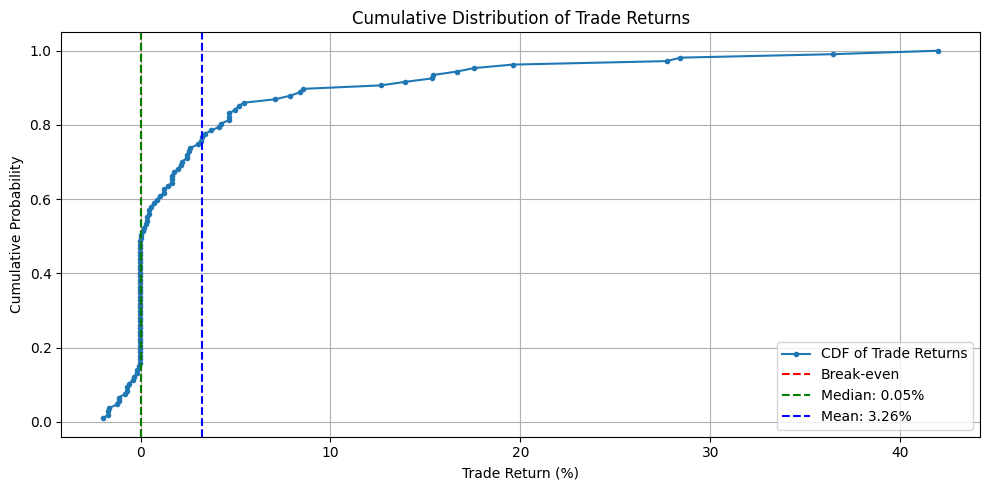

/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Code/Backtester_git/backtester.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = np.exp(self.results.loc[:idx, "Strategy"].cumsum())[-1]


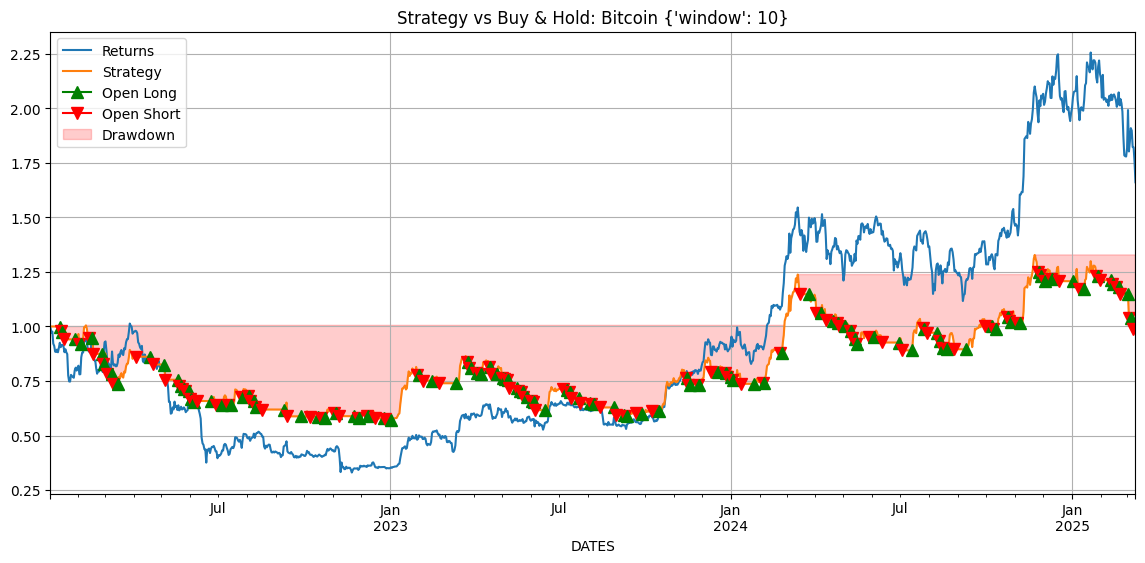

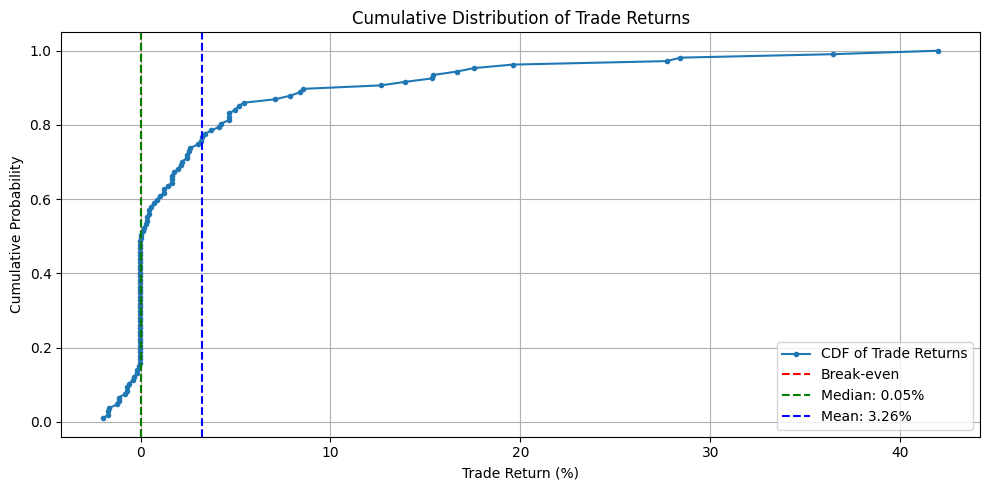

       start        end direction  log_return  net_return_pct  length  \
0 2022-01-12 2022-01-12      Long   -0.000400       -0.039992       1   
1 2022-01-14 2022-01-16      Long   -0.008263       -0.822889       3   
2 2022-01-28 2022-02-01      Long    0.025857        2.619416       5   
3 2022-02-04 2022-02-11      Long    0.045660        4.671824       8   
4 2022-02-15 2022-02-16      Long    0.001728        0.172904       2   
5 2022-02-26 2022-02-26      Long   -0.000400       -0.039992       1   
6 2022-02-28 2022-03-03      Long    0.010155        1.020682       4   
7 2022-03-09 2022-03-09      Long   -0.000400       -0.039992       1   
8 2022-03-15 2022-04-03      Long    0.161804       17.562994      20   
9 2022-04-19 2022-04-21      Long   -0.017063       -1.691836       3   

   total_fees  
0      0.0004  
1      0.0004  
2      0.0004  
3      0.0004  
4      0.0004  
5      0.0004  
6      0.0004  
7      0.0004  
8      0.0004  
9      0.0004  


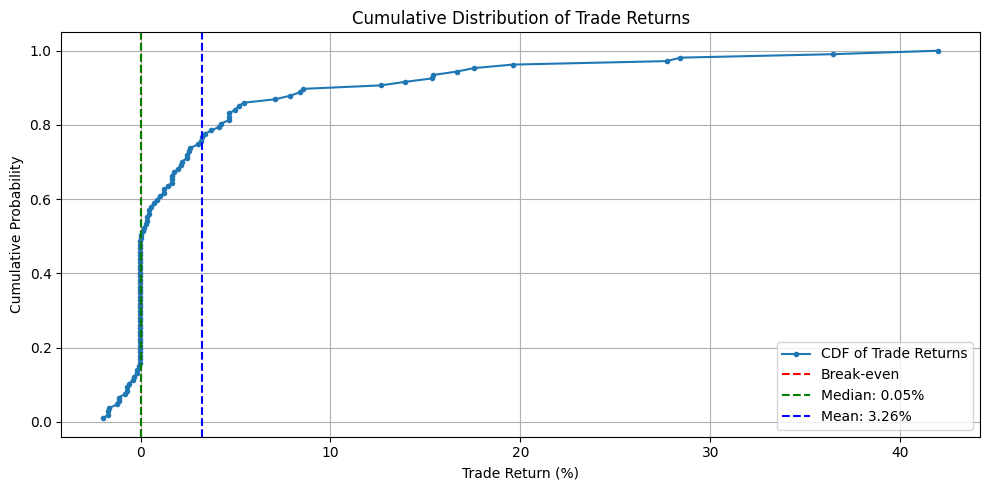

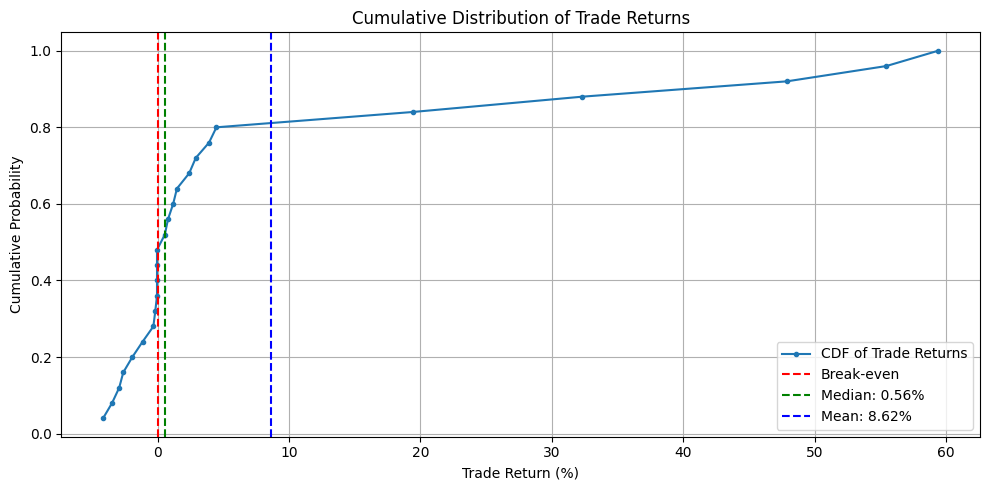

/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Code/Backtester_git/backtester.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = np.exp(self.results.loc[:idx, "Strategy"].cumsum())[-1]


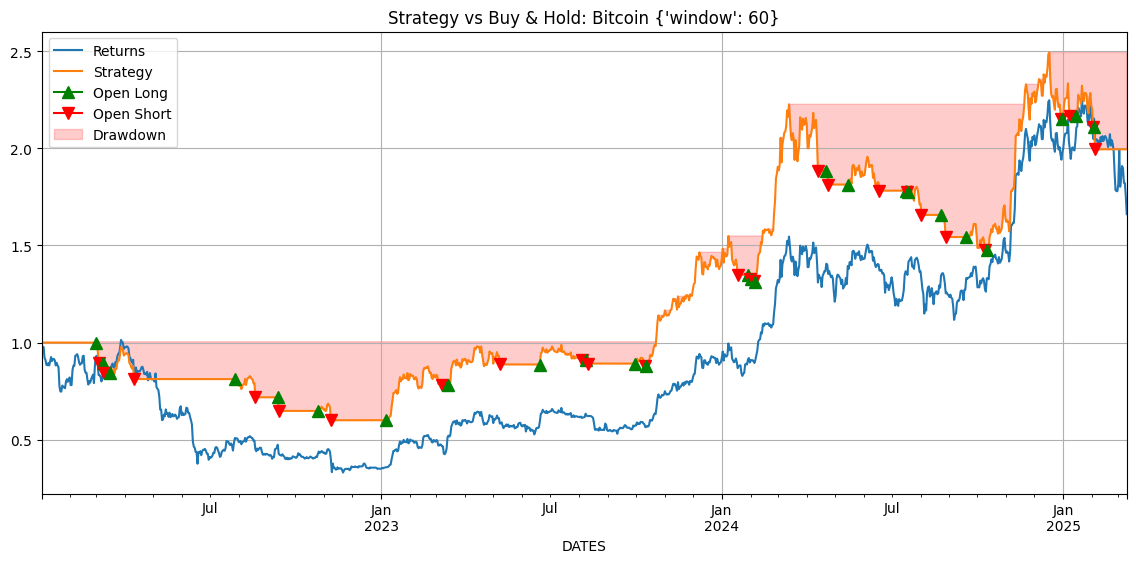

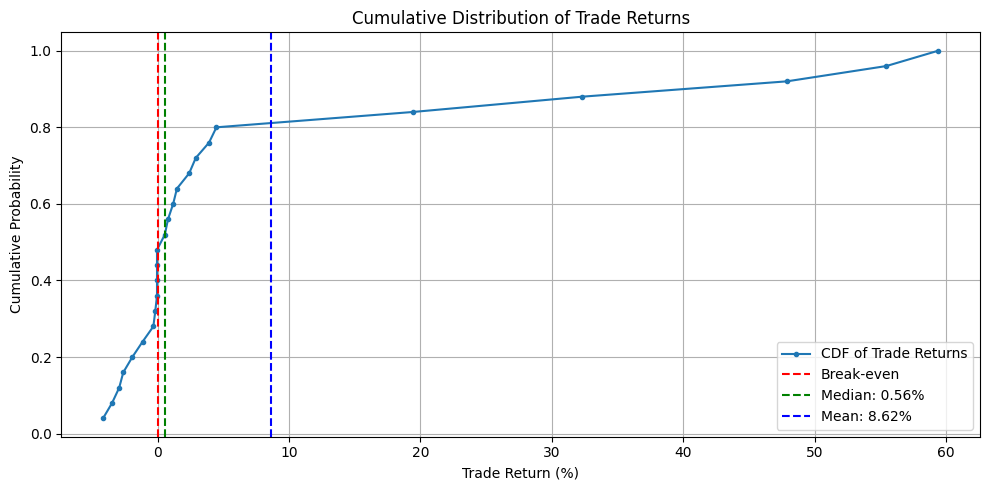

       start        end direction  log_return  net_return_pct  length  \
0 2022-03-01 2022-03-03      Long   -0.042344       -4.146003       3   
1 2022-03-09 2022-03-09      Long   -0.000400       -0.039992       1   
2 2022-03-16 2022-04-10      Long    0.043842        4.481744      26   
3 2022-07-28 2022-08-18      Long   -0.026407       -2.606106      22   
4 2022-09-12 2022-09-12      Long   -0.000400       -0.039992       1   
5 2022-10-25 2022-11-07      Long    0.023802        2.408743      14   
6 2023-01-06 2023-03-06      Long    0.280096       32.325694      60   
7 2023-03-13 2023-05-07      Long    0.177510       19.424008      56   
8 2023-06-20 2023-08-03      Long    0.038430        3.917829      45   
9 2023-08-08 2023-08-10      Long   -0.019362       -1.917528       3   

   total_fees  
0      0.0004  
1      0.0004  
2      0.0004  
3      0.0004  
4      0.0004  
5      0.0004  
6      0.0004  
7      0.0004  
8      0.0004  
9      0.0004  


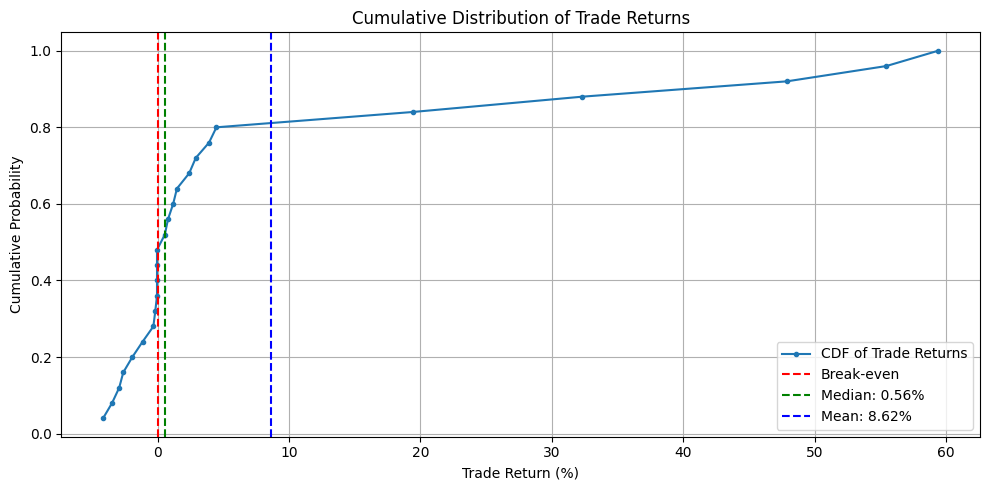

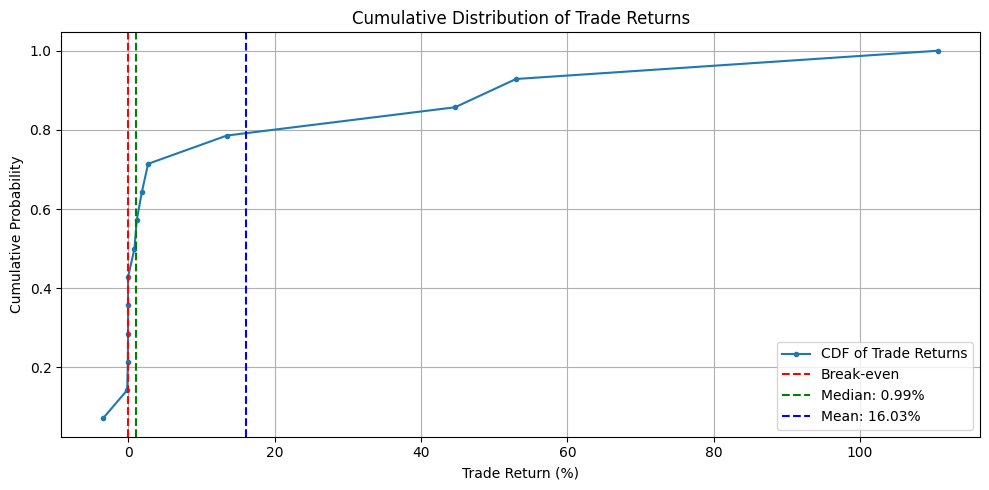

/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Code/Backtester_git/backtester.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = np.exp(self.results.loc[:idx, "Strategy"].cumsum())[-1]


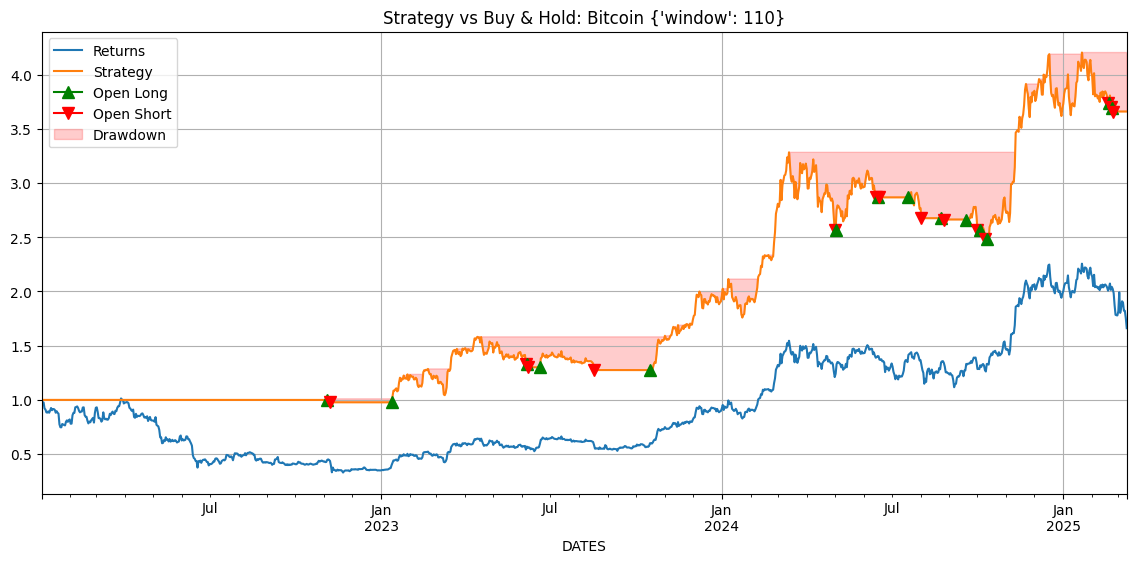

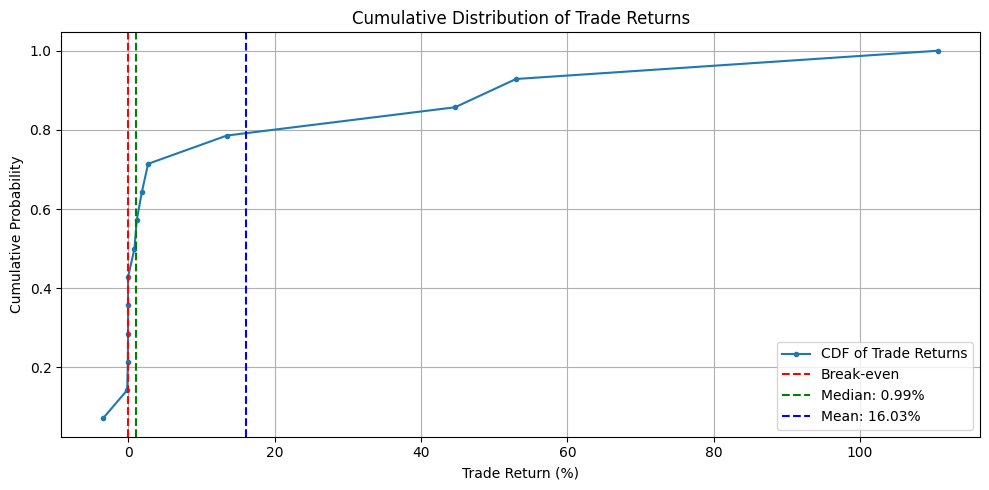

       start        end direction  log_return  net_return_pct  length  \
0 2022-11-04 2022-11-06      Long   -0.000708       -0.070781       3   
1 2023-01-12 2023-06-04      Long    0.369141       44.649149     144   
2 2023-06-06 2023-06-06      Long   -0.000400       -0.039992       1   
3 2023-06-20 2023-08-16      Long    0.026593        2.695015      58   
4 2023-10-16 2024-04-30      Long    0.745178      110.681734     198   
5 2024-05-02 2024-06-13      Long    0.126282       13.460218      43   
6 2024-06-16 2024-06-16      Long   -0.000400       -0.039992       1   
7 2024-07-19 2024-08-01      Long   -0.035213       -3.460002      14   
8 2024-08-23 2024-08-25      Long    0.008325        0.835930       3   
9 2024-09-19 2024-09-30      Long    0.011317        1.138098      12   

   total_fees  
0      0.0004  
1      0.0004  
2      0.0004  
3      0.0004  
4      0.0004  
5      0.0004  
6      0.0004  
7      0.0004  
8      0.0004  
9      0.0004  


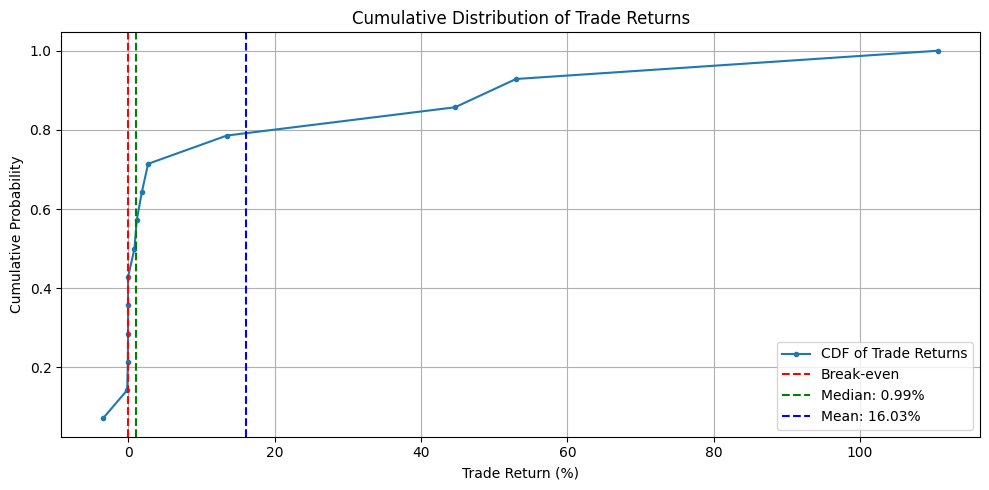

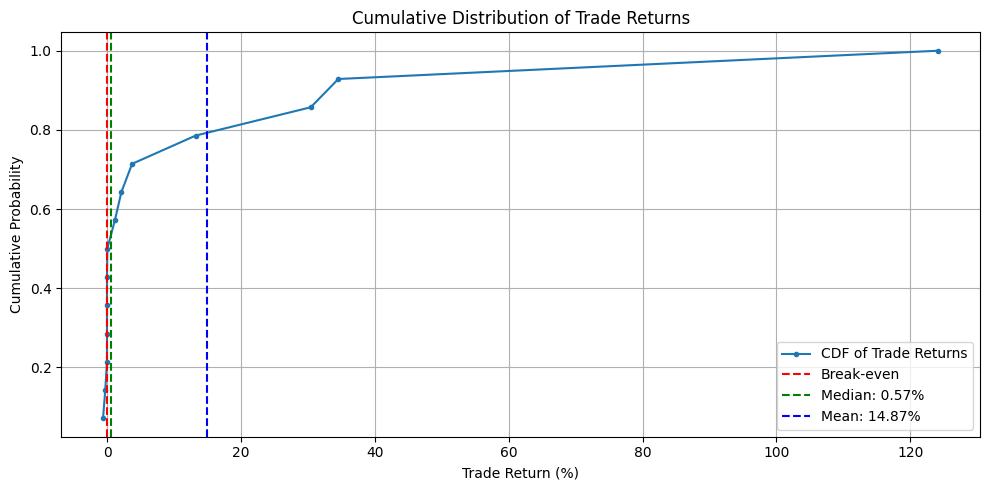

/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Code/Backtester_git/backtester.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = np.exp(self.results.loc[:idx, "Strategy"].cumsum())[-1]


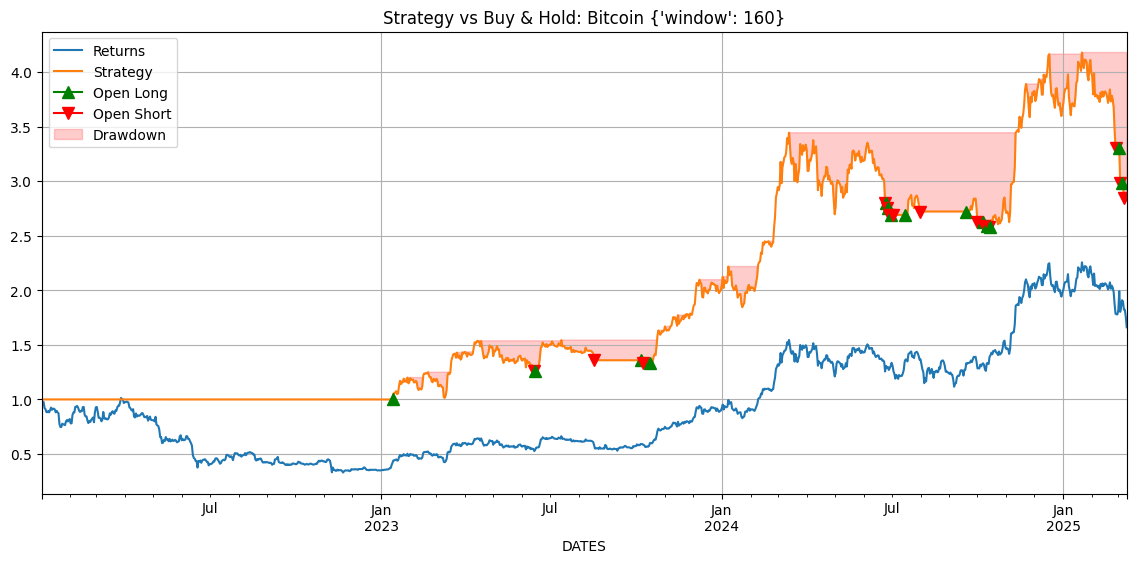

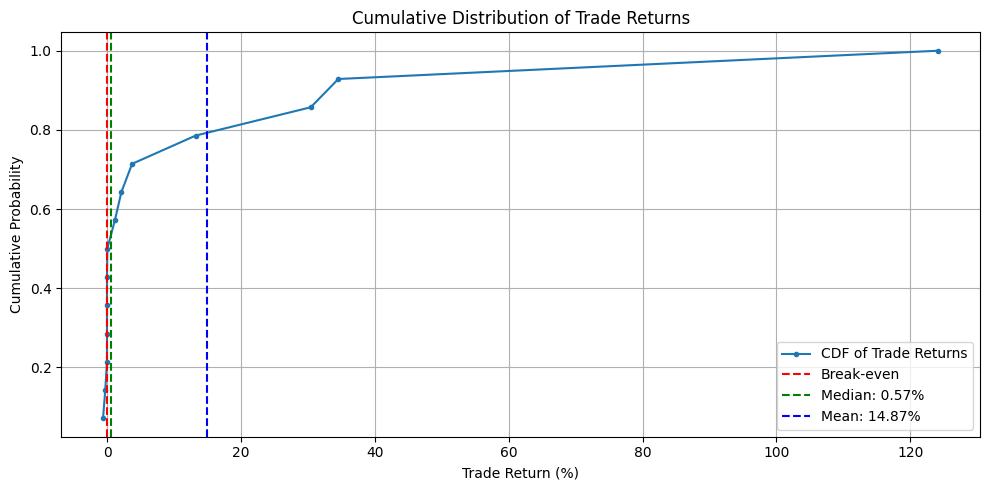

       start        end direction  log_return  net_return_pct  length  \
0 2023-01-13 2023-06-13      Long    0.265511       30.409707     152   
1 2023-06-15 2023-08-16      Long    0.124280       13.233237      63   
2 2023-10-06 2023-10-08      Long   -0.002969       -0.296504       3   
3 2023-10-16 2024-06-23      Long    0.807284      124.181029     252   
4 2024-06-25 2024-06-25      Long   -0.000400       -0.039992       1   
5 2024-06-27 2024-06-27      Long   -0.000400       -0.039992       1   
6 2024-06-30 2024-07-01      Long    0.020874        2.109299       2   
7 2024-07-15 2024-07-30      Long    0.036472        3.714538      16   
8 2024-09-19 2024-09-30      Long    0.011317        1.138098      12   
9 2024-10-07 2024-10-07      Long   -0.000400       -0.039992       1   

   total_fees  
0      0.0004  
1      0.0004  
2      0.0004  
3      0.0004  
4      0.0004  
5      0.0004  
6      0.0004  
7      0.0004  
8      0.0004  
9      0.0004  


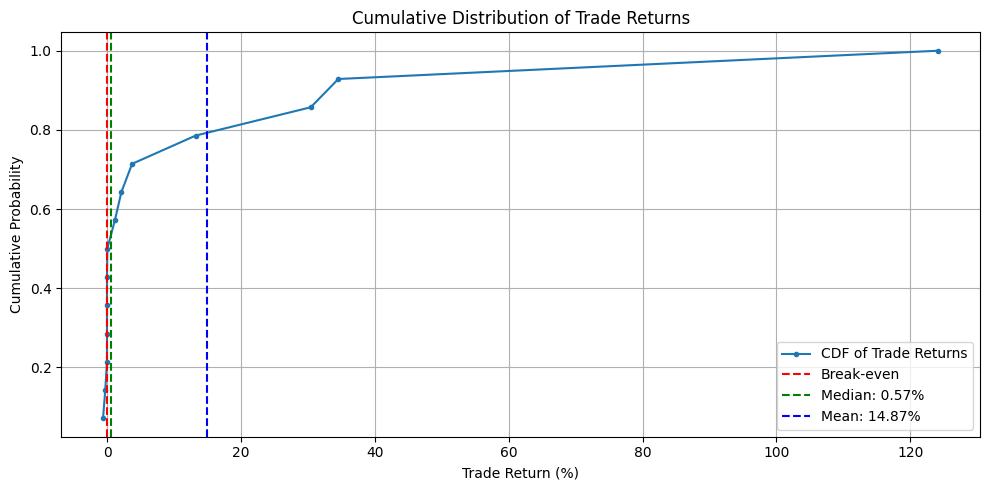

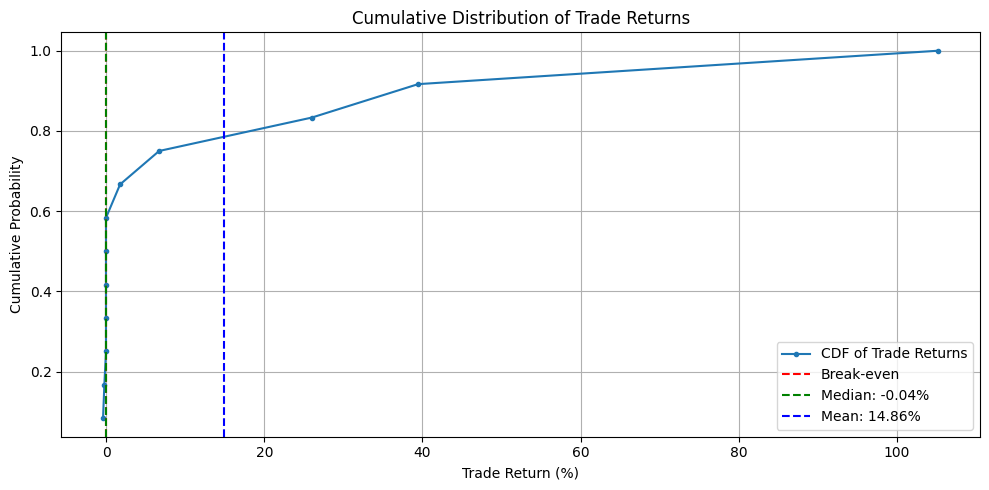

/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Code/Backtester_git/backtester.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = np.exp(self.results.loc[:idx, "Strategy"].cumsum())[-1]


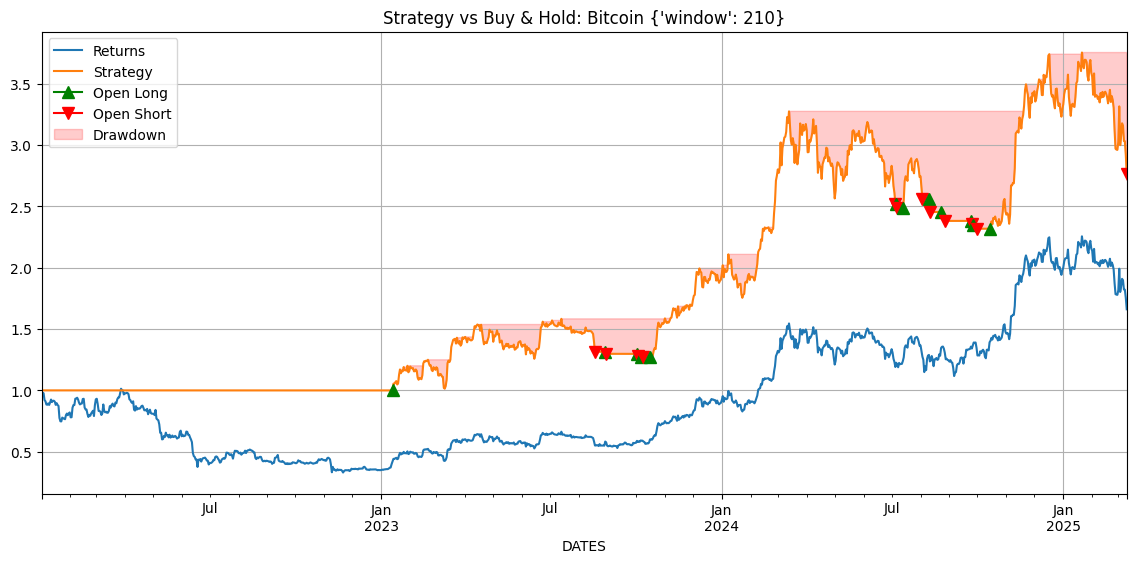

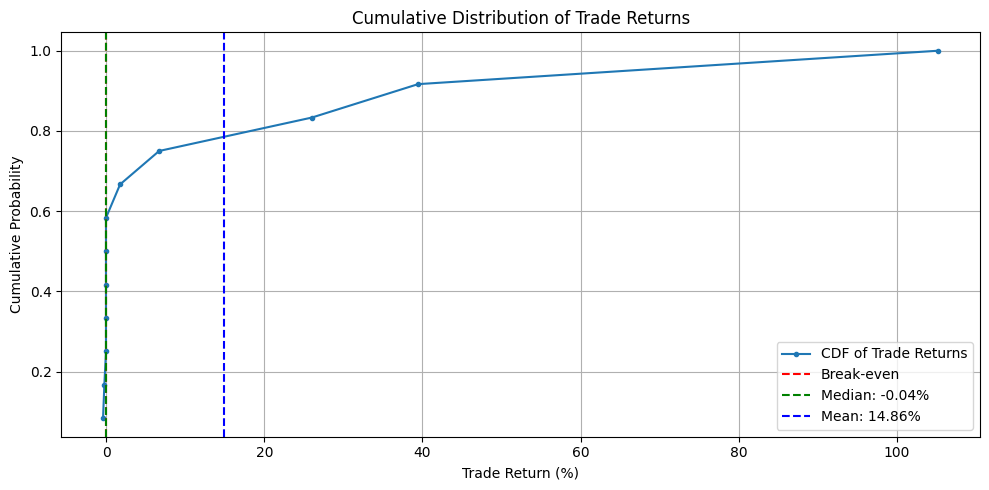

       start        end direction  log_return  net_return_pct  length  \
0 2023-01-13 2023-08-17      Long    0.332570       39.454794     217   
1 2023-08-29 2023-08-29      Long   -0.000400       -0.039992       1   
2 2023-10-02 2023-10-02      Long   -0.000400       -0.039992       1   
3 2023-10-06 2023-10-07      Long   -0.002467       -0.246373       2   
4 2023-10-16 2024-07-04      Long    0.719121      105.262817     263   
5 2024-07-06 2024-07-06      Long   -0.000400       -0.039992       1   
6 2024-07-13 2024-08-02      Long    0.064724        6.686495      21   
7 2024-08-10 2024-08-10      Long   -0.000400       -0.039992       1   
8 2024-08-23 2024-08-26      Long   -0.004130       -0.412188       4   
9 2024-09-24 2024-09-24      Long   -0.000400       -0.039992       1   

   total_fees  
0      0.0004  
1      0.0004  
2      0.0004  
3      0.0004  
4      0.0004  
5      0.0004  
6      0.0004  
7      0.0004  
8      0.0004  
9      0.0004  


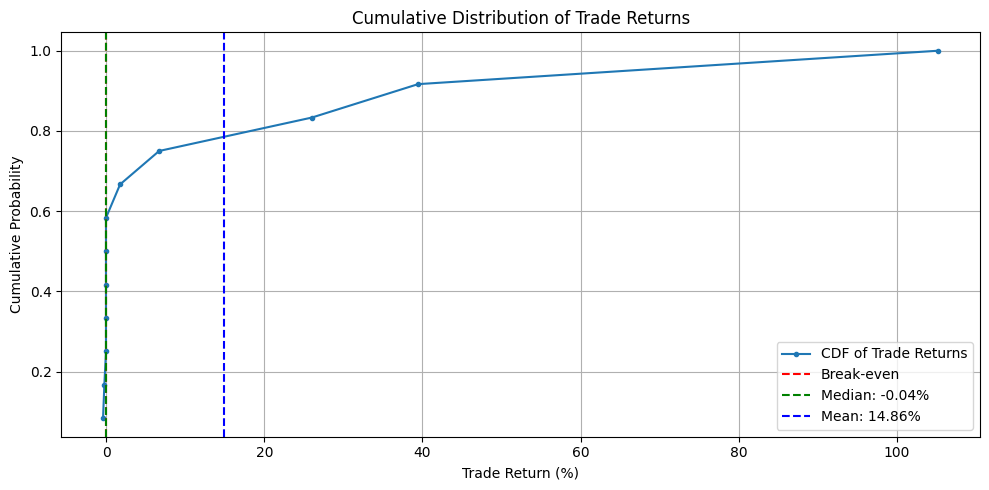

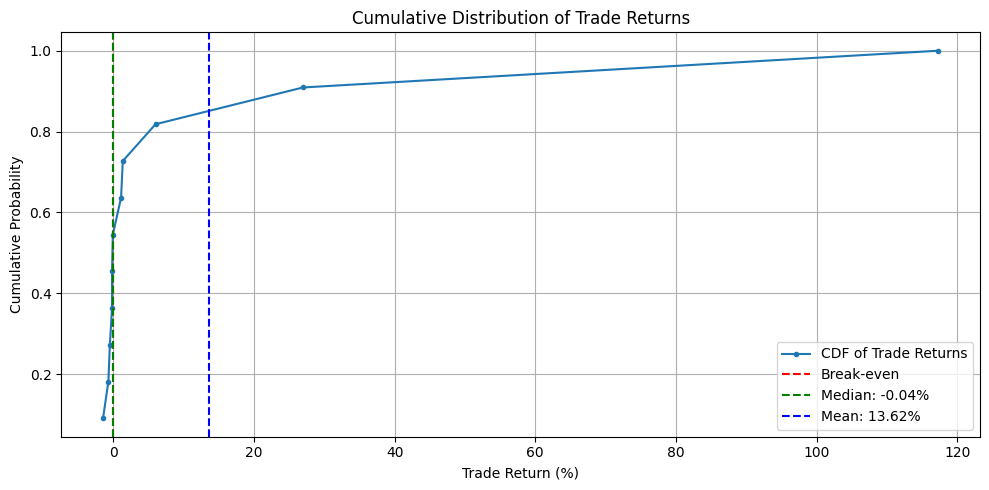

/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Code/Backtester_git/backtester.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = np.exp(self.results.loc[:idx, "Strategy"].cumsum())[-1]


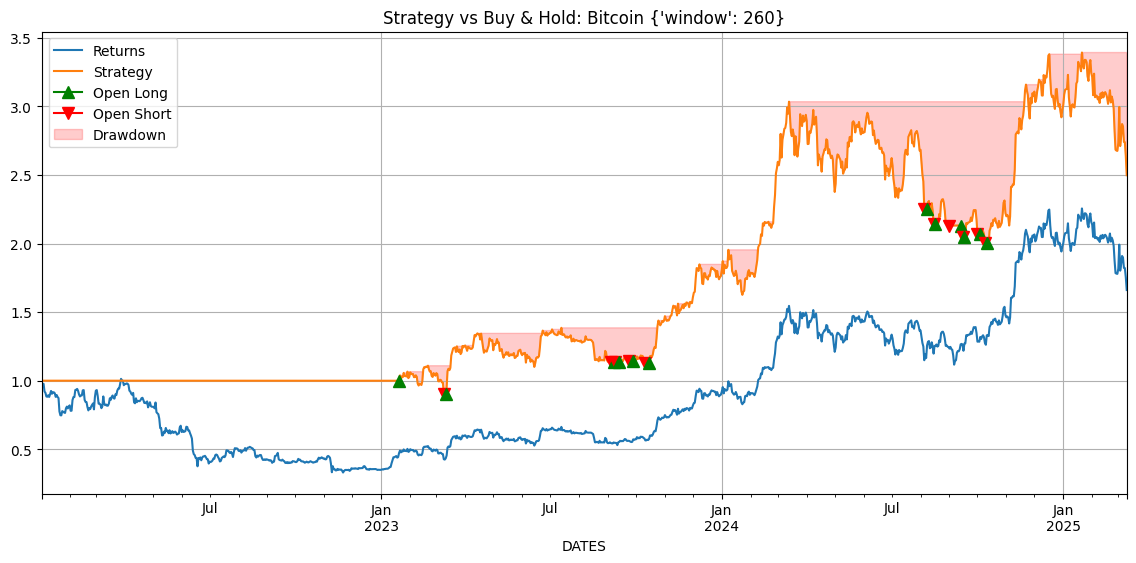

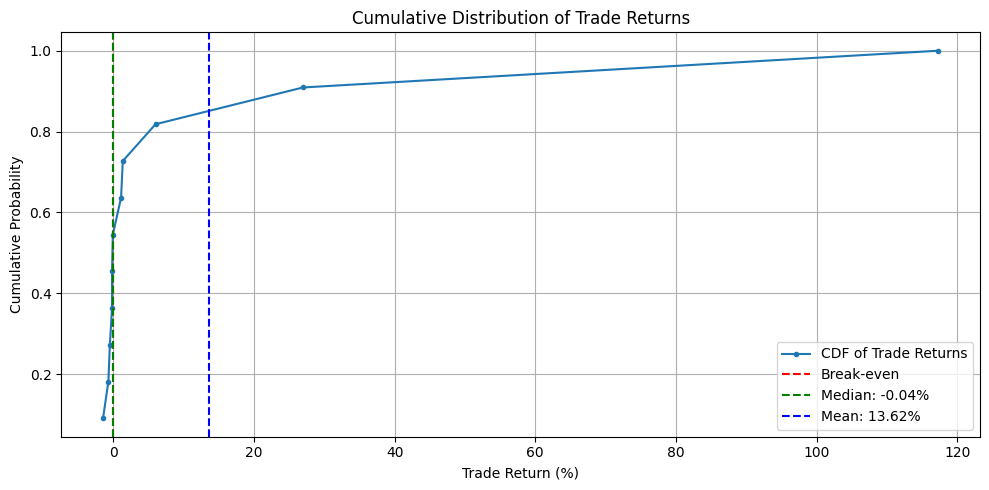

       start        end direction  log_return  net_return_pct  length  \
0 2023-01-20 2023-03-08      Long   -0.014466       -1.436228      48   
1 2023-03-11 2023-09-03      Long    0.238851       26.978888     177   
2 2023-09-07 2023-09-07      Long   -0.000400       -0.039992       1   
3 2023-09-13 2023-09-23      Long    0.013626        1.371945      11   
4 2023-09-28 2023-10-10      Long    0.011203        1.126643      13   
5 2023-10-15 2024-08-04      Long    0.775993      117.274769     295   
6 2024-08-08 2024-08-14      Long   -0.006801       -0.677819       7   
7 2024-08-16 2024-08-30      Long   -0.004689       -0.467753      15   
8 2024-09-13 2024-09-15      Long   -0.001562       -0.156081       3   
9 2024-09-17 2024-09-30      Long    0.058488        6.023175      14   

   total_fees  
0      0.0004  
1      0.0004  
2      0.0004  
3      0.0004  
4      0.0004  
5      0.0004  
6      0.0004  
7      0.0004  
8      0.0004  
9      0.0004  


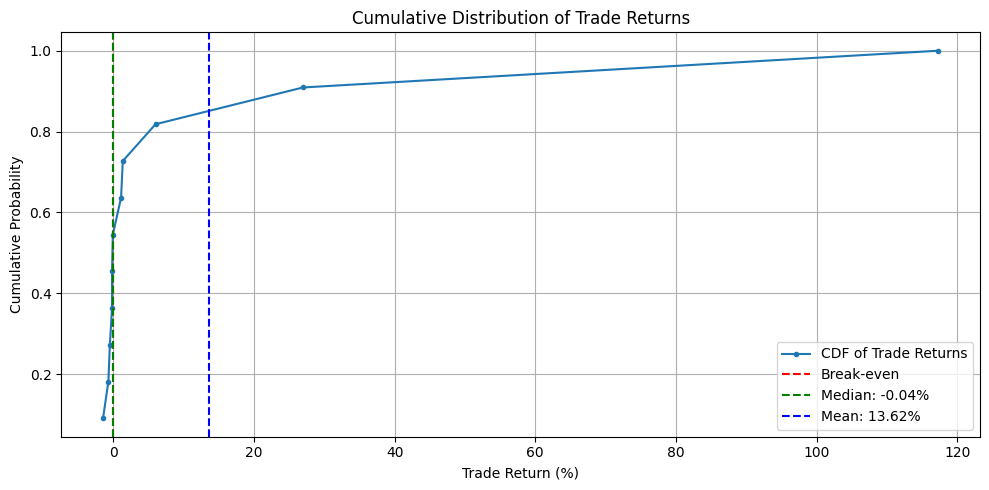

     asset  window  total_net_return  annualized_return  sharpe  max_drawdown  \
0  Bitcoin     110            2.6595             0.3243    0.98       -0.2478   
1  Bitcoin     160            1.8495             0.2545    0.76       -0.3181   
2  Bitcoin     210            1.7636             0.2462    0.72       -0.2924   
3  Bitcoin     260            1.4985             0.2193    0.62       -0.3430   
4  Bitcoin      60            0.9954             0.1613    0.52       -0.4030   
5  Bitcoin      10           -0.0104            -0.0023   -0.01       -0.4327   

   avg_trade_return  median_trade_return  avg_trade_return_long  \
0           0.16034              0.00987                0.16034   
1           0.14875              0.00574                0.14875   
2           0.14858             -0.00040                0.14858   
3           0.13622             -0.00040                0.13622   
4           0.08616              0.00557                0.08616   
5           0.03257           

In [ ]:
assets=['Bitcoin']
new_results = []
for asset in assets:
    df = xls[[asset]]
    for params in get_param_combinations(param_grid):
        strategy = strategy_class(df.columns[0],**params)

        bt = Backtester(
            data=df.copy(),
            strategy=strategy,
            initial_cash=initial_cash
        )
        bt.run()
        bt.evaluate(silent=True)
        bt.plot(params=params)
        print(bt.extract_trades().head(10))

        result = {
            "asset": asset,
            **params,
            **bt.get_performance_metrics()
        }

        new_results.append(result)

# Convert results to DataFrame
new_results_df = pd.DataFrame(new_results)
new_results_df.sort_values(by="sharpe", ascending=False, inplace=True)
new_results_df.reset_index(drop=True, inplace=True)
print(new_results_df)